# Processing of CVs to create a desired profile

In [7]:
import sys
sys.path.append('../data/')
sys.path.append('../src/')
import cv
import pandas as pd
import os
import string
import fitz
from io import StringIO
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [8]:
my_files_path = "../data/"
blackbook = '../data/blackbook.pdf'
my_files = cv.get_files(my_files_path)
kw_list = "../skill_set.csv"

In [9]:
my_files[0]

'../data/talenza.pdf'

In [10]:
# Process the datasheets
file_db = pd.DataFrame()
i = 0
while i < len(my_files):
    file = my_files[i]
    data = cv.candidate_profile(file, kw_list)
    file_db = file_db.append(data)
    i += 1
  #  print(file_db)
file_db

,Company,Domain,Buzzword,Count
0,talenza,data_analysis,data,7
1,talenza,data_analysis,reporting,3
2,talenza,data_analysis,analytics,3
3,talenza,machine_learning,analytics,3
4,talenza,deep_learning,analytics,3
...,...,...,...,...
5,alloc8,data_engineering,data management,1
6,alloc8,data_analysis,analysis,1
7,alloc8,data_analysis,analytics,2
8,alloc8,machine_learning,analytics,2


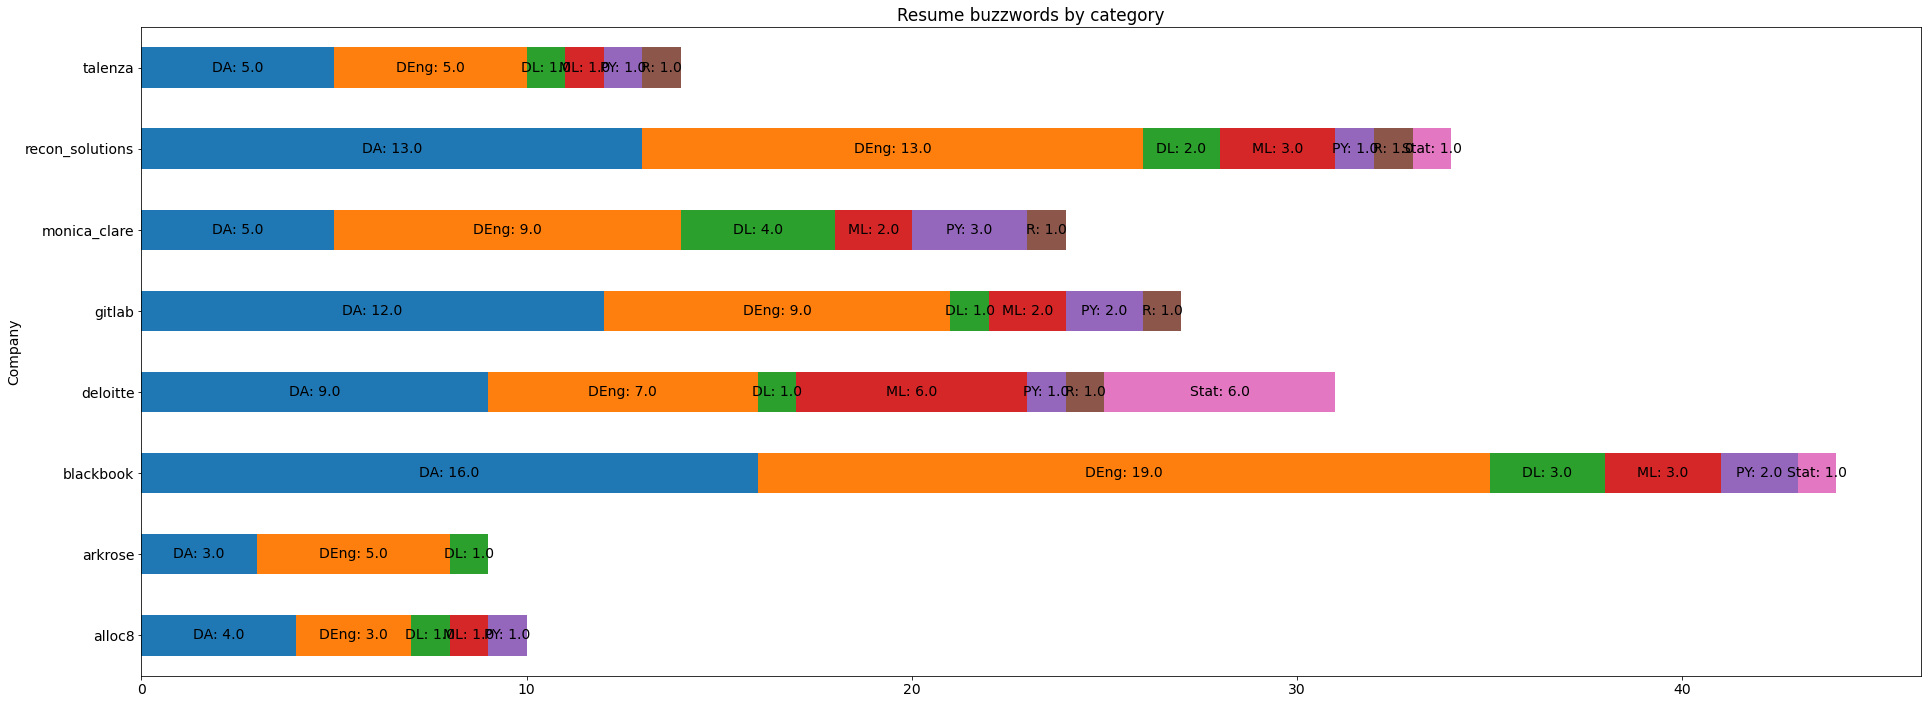

In [37]:
file_db2 = file_db['Domain'].groupby([file_db['Company'], file_db['Domain']]).count().unstack()
file_db2.reset_index(inplace=True)
file_db2.fillna(0, inplace=True)
new_data = file_db2.iloc[:,1:]
new_data.index = file_db2['Company']
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
ax = new_data.plot.barh(title="Resume buzzwords by category", legend=False, figsize=(27,10), stacked=True)

labels = []
label_code = ["DA", "DEng", "DL", "ML", "PY", "R", "Stat"]
for jid, j in enumerate(new_data.columns):
    for i in new_data.index:
        label = label_code[jid]+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
        
plt.tight_layout()
plt.savefig("../figures/distribution.png")
plt.show()

In [33]:
str(new_data.loc[i][j])

'0.0'